# EDA on Algerian forest fire dataset

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reading the data
df = pd.read_csv(r'C:\Users\sahil\Documents\ineuron\dataset\Algerian_forest_fires_dataset_UPDATE.csv', header = 1)

In [5]:
df.shape

(246, 14)

In [19]:
# Removing empty row
df_copy = df.drop(index = 122)

In [28]:
# Removing headers inbetween rows
df_copy.drop(index = 123, inplace = True, axis = 0)

In [36]:
# reset index as there will be gaps in the index
df_copy.reset_index(inplace = True)

In [39]:
# Removing index column
df_copy.drop(columns=['index'], inplace = True, axis = 0)

In [40]:
df_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


#  Data Information

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and â€œnot not fire

In [41]:
df_copy['region'] = 1

In [43]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [47]:
# Setting value for bajaia region as 1 & Sidi-Bel Abbes Region as 0

for i in range(len(df_copy)):
    if i >= 122:
        df_copy['region'][i] = 0

C:\Users\sahil\AppData\Local\Temp\ipykernel_32016\4113138662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['region'][i] = 0


In [53]:
# Dimension of the data
df_copy.shape

(244, 15)

In [55]:
df_copy.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [56]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [60]:
# Changing the data types of the columns
df_copy['Temperature'] = df_copy['Temperature'].astype('int')
df_copy[' RH'] = df_copy[" RH"].astype('int')
df_copy[' Ws'] = df_copy[' Ws'].astype('int')
df_copy['Rain '] = df_copy['Rain '].astype('float')
df_copy['FFMC'] = df_copy['FFMC'].astype('float')
df_copy['DMC'] = df_copy['DMC'].astype('float')


In [63]:
# error in this entry
df_copy.iloc[165,:]

day                 14
month               07
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC                14.6
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
region               0
Name: 165, dtype: object

In [73]:
# correcting wrong entry in the data
df_copy.at[165,'DC'] = 14.6
df_copy.at[165,'ISI'] = 9
df_copy.at[165,'BUI'] = 12.5
df_copy.at[165,'FWI'] = 10.4
df_copy.at[165,'Classes  '] = 'fire'


In [100]:
# Changing the data type of the features
df_copy['DC'] = df_copy['DC'].astype('float')
df_copy['ISI'] = df_copy['ISI'].astype('float')
df_copy['BUI'] = df_copy['BUI'].astype('float')
df_copy['FWI'] = df_copy['FWI'].astype('float')
df_copy['day'] = df_copy['day'].astype('int')
df_copy['month'] = df_copy['month'].astype('int')
df_copy['year'] = df_copy['year'].astype('int')

In [140]:
df_copy.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [141]:
# removing extra spaces in columns name
df_copy.columns = [col.strip() for col in df_copy.columns]

In [78]:
df_copy.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [79]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [168]:
# Checking for Zero variance 
df_copy.var()==0

day            False
month          False
Temperature    False
RH             False
Ws             False
Rain           False
FFMC           False
DMC            False
DC             False
ISI            False
BUI            False
FWI            False
region         False
dtype: bool

In [142]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   Temperature  244 non-null    int32  
 3   RH           244 non-null    int32  
 4   Ws           244 non-null    int32  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Classes      244 non-null    object 
 13  region       244 non-null    int64  
dtypes: float64(7), int32(5), int64(1), object(1)
memory usage: 22.0+ KB


In [144]:
# 5 point Summary
df_copy.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.500000
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.501028
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,0.500000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [143]:
# Checking for null values
df_copy.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [86]:
# Checking for duplicate values

df_copy.duplicated().sum()

0

There is no duplicate value

In [ ]:
## seperating numerical and categorical columns

In [145]:
numeric_col = [col for col in df_copy.columns if df_copy[col].dtype != 'O']
categorical_col = [col for col in df_copy.columns if df_copy[col].dtype =='O']

In [146]:
print(f'There are {len(numeric_col)} and name are {numeric_col}')
print(f'There are {len(categorical_col)} and name are {categorical_col}')

There are 13 and name are ['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'region']
There are 1 and name are ['Classes']


## Univariate analysis

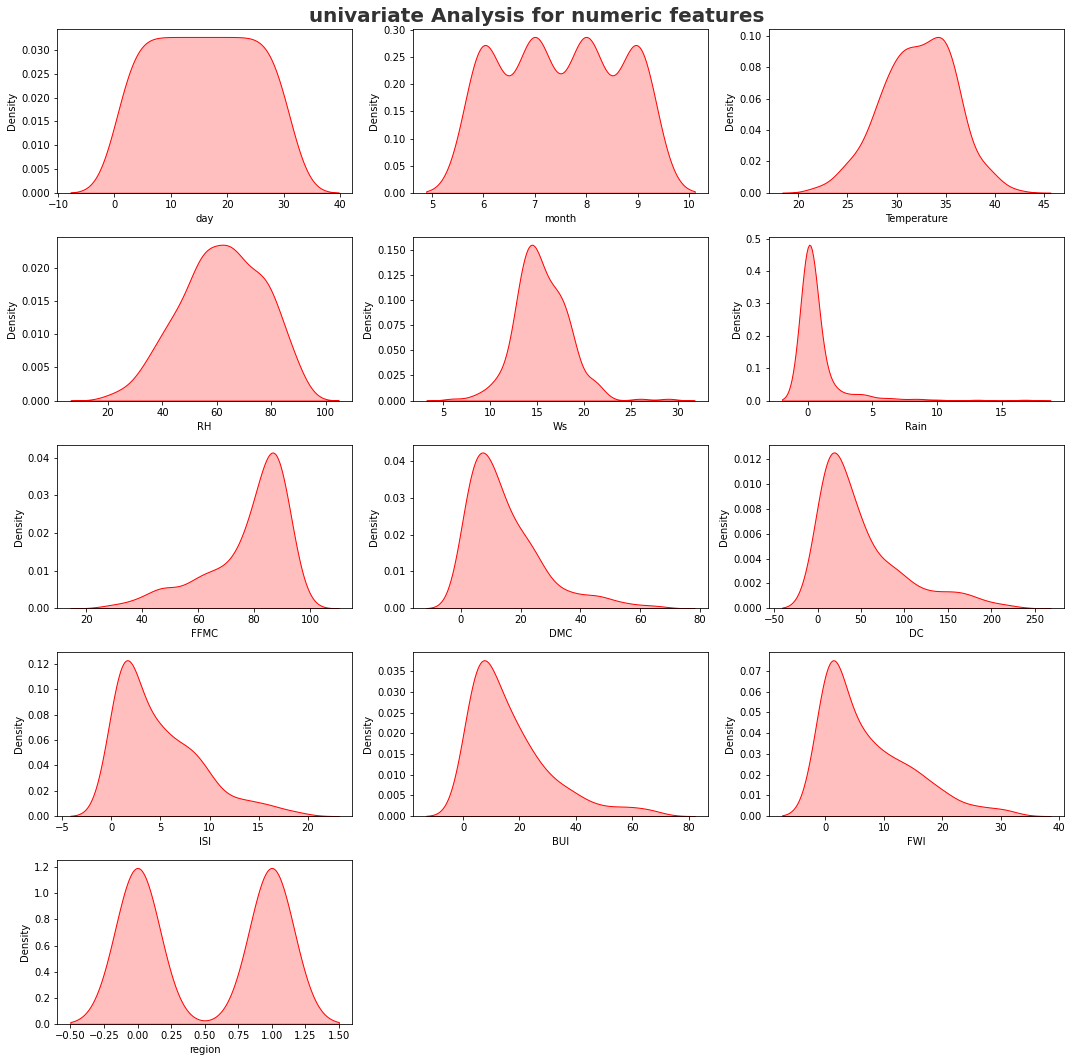

In [147]:
plt.figure(figsize =(15,15))
plt.suptitle('univariate Analysis for numeric features',fontsize = 20, fontweight='bold', alpha=0.8 )

for i in range (0, len(numeric_col)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_col[i]], shade= True, color='r')
    plt.xlabel(numeric_col[i])
    plt.tight_layout()

Report
- Year has no variance.
- Rain, DM, DC, ISI, BUI and FWI are right skewed
- FFMC is left skewed

In [113]:
# There were space error in the column
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [115]:
df_copy['Classes'] = df_copy['Classes'].str.strip()

In [116]:
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

<AxesSubplot:xlabel='Classes', ylabel='count'>

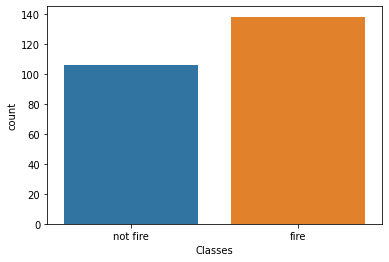

In [169]:
sns.countplot(df_copy['Classes'])

In [181]:
df_copy.groupby(['month','Classes'])['Classes'].count()

month  Classes 
6      fire        25
       not fire    35
7      fire        39
       not fire    23
8      fire        51
       not fire    11
9      fire        23
       not fire    37
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

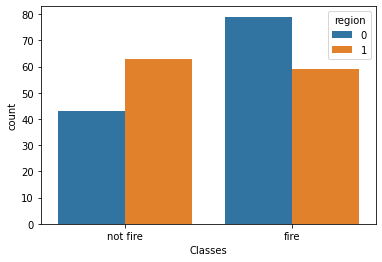

In [170]:
sns.countplot(df_copy['Classes'], hue=df_copy['region'])

In [ ]:
Report:
    - Sidi-Bel Abbes has more fire days than bijaia
    

In [121]:
## Since Year has zero variance it will not give any information so we can drop it

df_copy.drop(columns=['year'], axis=1, inplace = True)

# Scatter plot

<AxesSubplot:ylabel='Rain'>

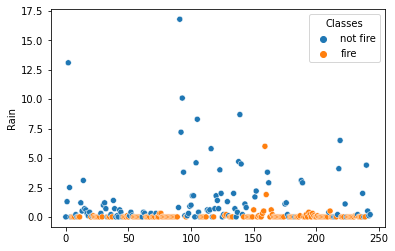

In [128]:
sns.scatterplot(x=df_copy.index, y ='Rain', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='month'>

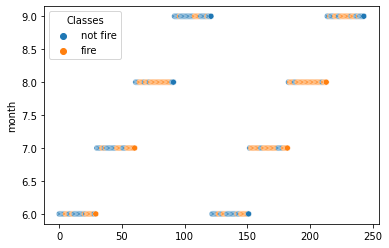

In [129]:
sns.scatterplot(x=df_copy.index, y ='month', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='Temperature'>

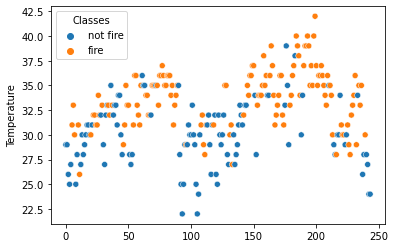

In [130]:
sns.scatterplot(x=df_copy.index, y ='Temperature', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='RH'>

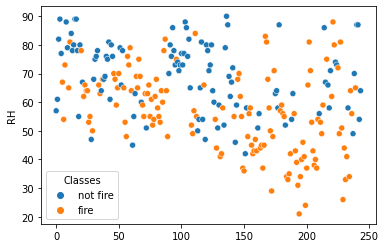

In [131]:
sns.scatterplot(x=df_copy.index, y ='RH', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='Ws'>

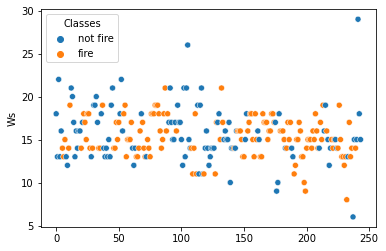

In [132]:
sns.scatterplot(x=df_copy.index, y ='Ws', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='FFMC'>

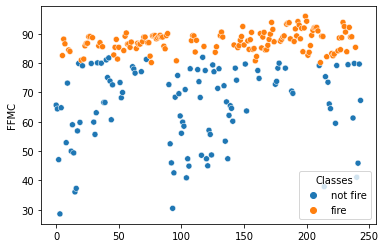

In [133]:
sns.scatterplot(x=df_copy.index, y ='FFMC', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='DMC'>

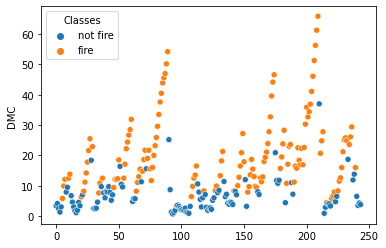

In [134]:
sns.scatterplot(x=df_copy.index, y ='DMC', data= df_copy, hue=df_copy['Classes'])

In [ ]:
Report :- 
    DMC above 10 has highest chance of fire
    

<AxesSubplot:ylabel='DC'>

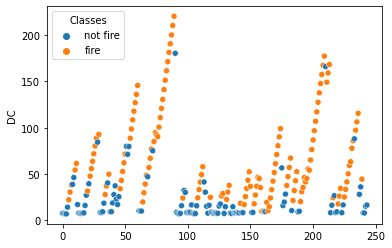

In [135]:
sns.scatterplot(x=df_copy.index, y ='DC', data= df_copy, hue=df_copy['Classes'])

In [ ]:
- Report:
    Higher draught higher the chance of fire

<AxesSubplot:ylabel='ISI'>

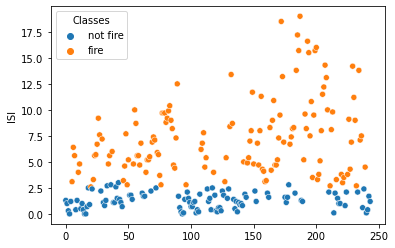

In [136]:
sns.scatterplot(x=df_copy.index, y ='ISI', data= df_copy, hue=df_copy['Classes'])

In [ ]:
Report :
    Speed index greater than 2.5 indicates the fire.

<AxesSubplot:ylabel='BUI'>

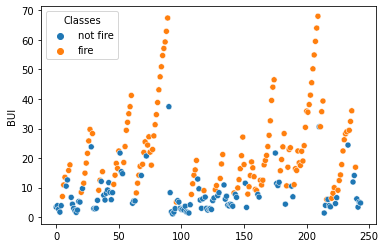

In [137]:
sns.scatterplot(x=df_copy.index, y ='BUI', data= df_copy, hue=df_copy['Classes'])

<AxesSubplot:ylabel='FWI'>

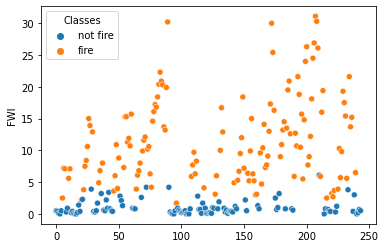

In [138]:
sns.scatterplot(x=df_copy.index, y ='FWI', data= df_copy, hue=df_copy['Classes'])

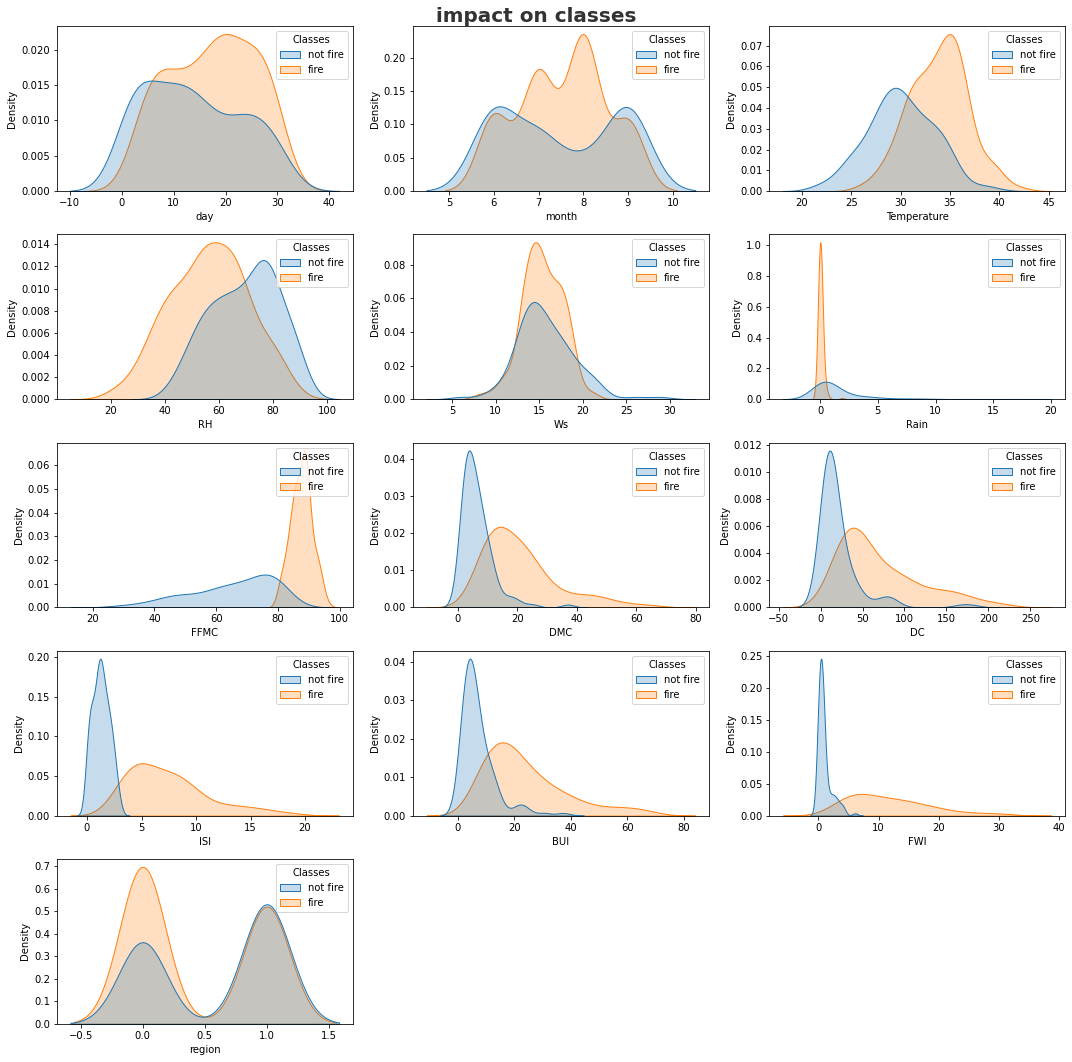

In [150]:
plt.figure(figsize =(15,15))
plt.suptitle('impact on classes',fontsize = 20, fontweight='bold', alpha=0.8 )

for i in range (0, len(numeric_col)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_col[i]], hue= df_copy['Classes'], shade= True, color='r')
    plt.xlabel(numeric_col[i])
    plt.tight_layout()

Inference 

- maximum fire occurs in the month of july and aug.
- Temperature highly impacts the fire 
- Maximum fire occures at humidity between 40-60
- Rain inversely impacts the fire
- Increase in DMC, DC, ISI, BUI, FWI increase chances of fire.

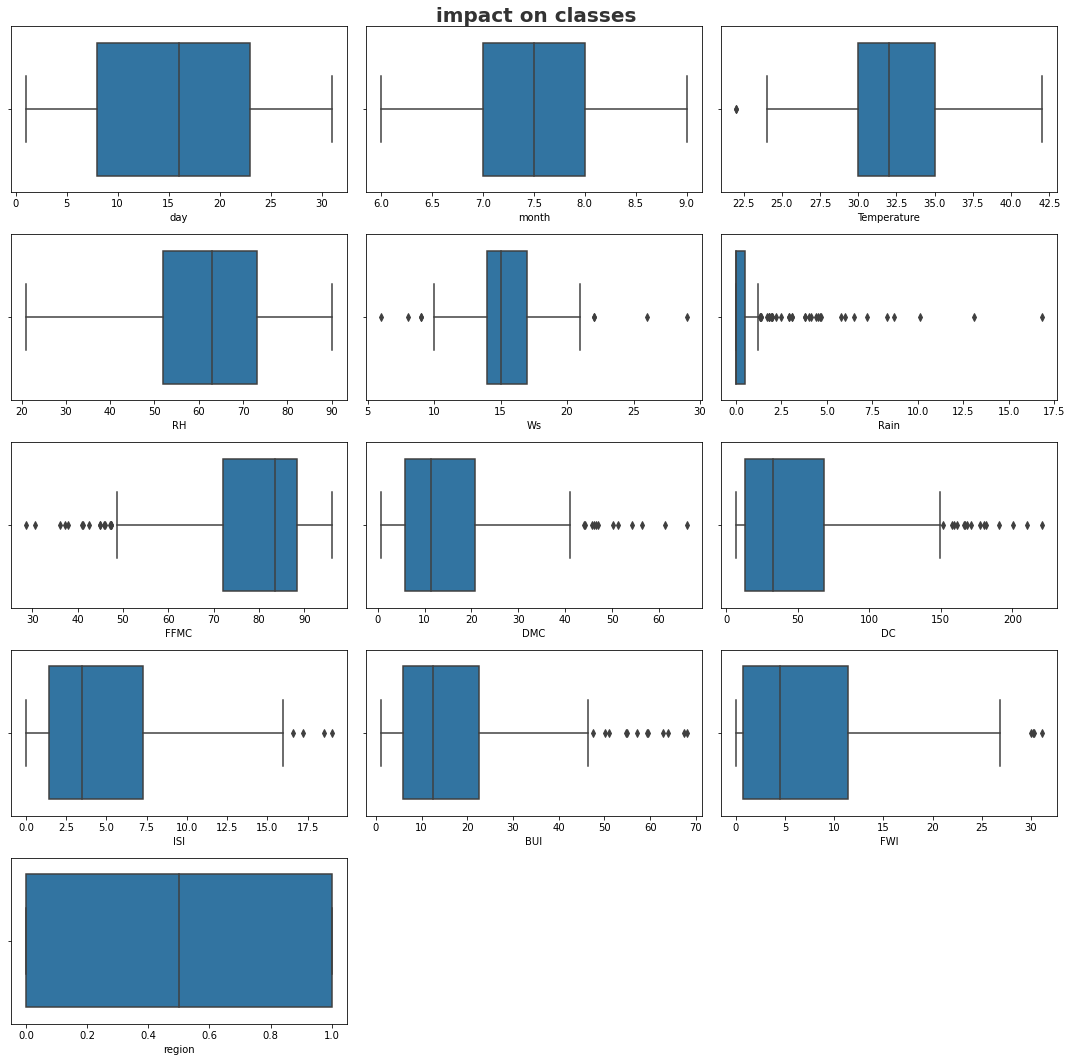

In [152]:
plt.figure(figsize =(15,15))
plt.suptitle('impact on classes',fontsize = 20, fontweight='bold', alpha=0.8 )

for i in range (0, len(numeric_col)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df_copy[numeric_col[i]], hue= df_copy['Classes'])
    plt.xlabel(numeric_col[i])
    plt.tight_layout()

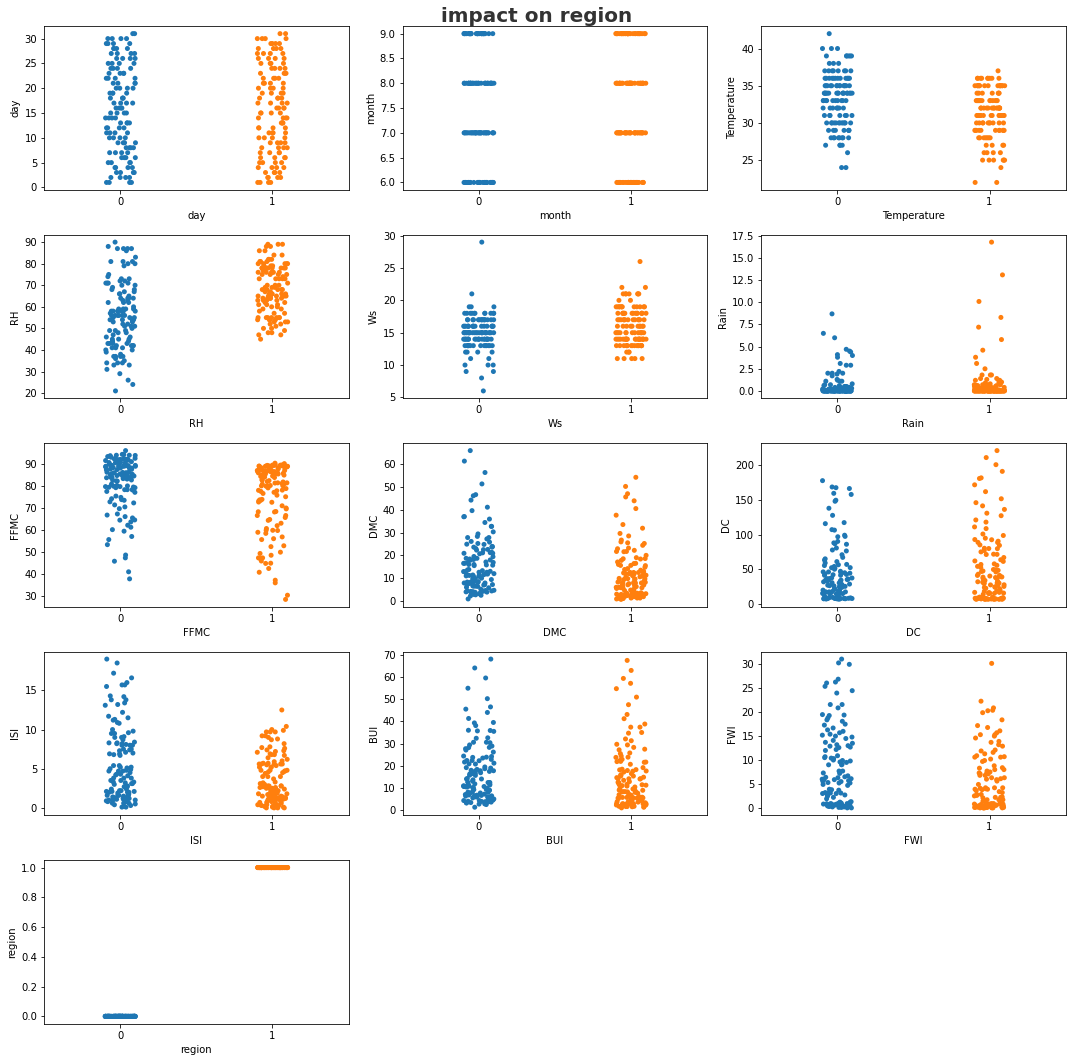

In [162]:
plt.figure(figsize =(15,15))
plt.suptitle('impact on region',fontsize = 20, fontweight='bold', alpha=0.8 )

for i in range (0, len(numeric_col)):
    plt.subplot(5,3,i+1)
    sns.stripplot(x='region',y=numeric_col[i],data=df_copy)
    plt.xlabel(numeric_col[i])
    plt.tight_layout()

# Rain vs Month

<AxesSubplot:xlabel='month', ylabel='Rain'>

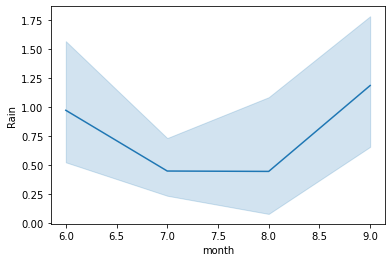

In [161]:
sns.lineplot(x = 'month', y = 'Rain', data = df_copy )

Inference - 

Rain is less in july and aug

In [ ]:
Temperature Vs WindSpeed

<AxesSubplot:xlabel='Temperature', ylabel='Ws'>

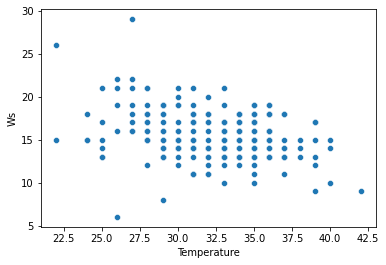

In [164]:
sns.scatterplot(x = 'Temperature', y = 'Ws', data = df_copy)

<AxesSubplot:xlabel='Temperature', ylabel='Ws'>

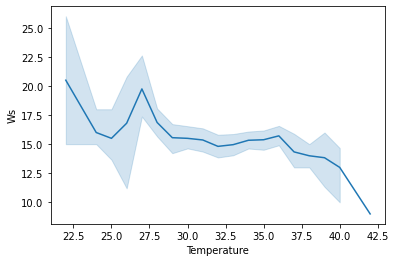

In [165]:
sns.lineplot(x = 'Temperature', y = 'Ws', data = df_copy)

# Multivariate Analysis

In [122]:
df_copy.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234,-4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,6.718556e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,-2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,-2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,-1.910937e-01
DC,5.279285e-01,1.276719e-01,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,8.148947e-02
ISI,1.793008e-01,6.354476e-02,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,-2.662977e-01


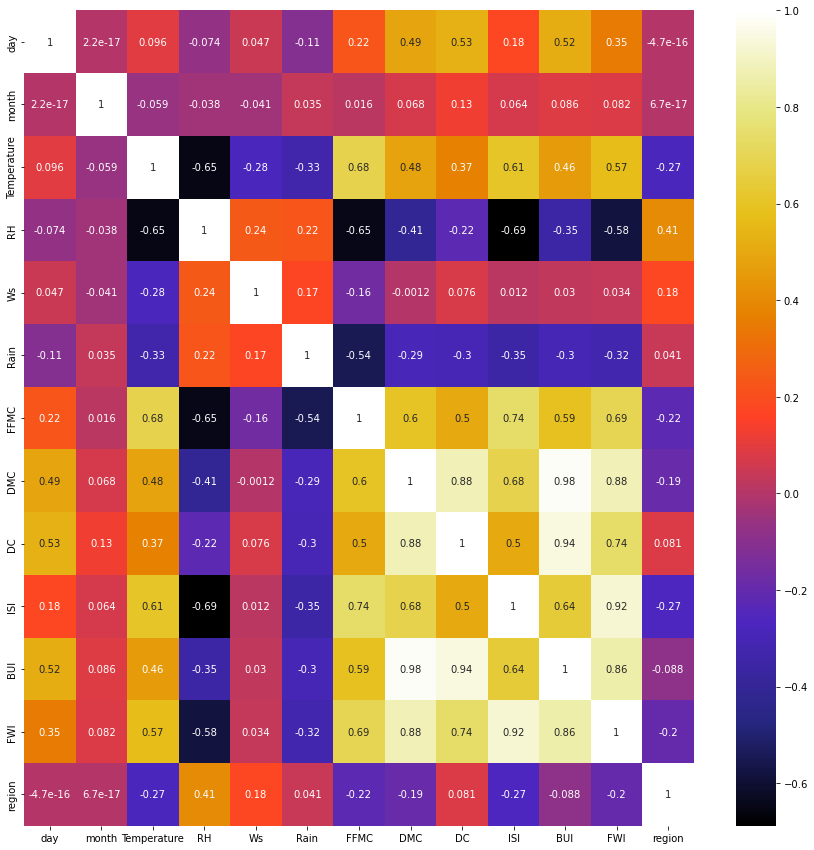

In [123]:
plt.figure(figsize=(15,15))
sns.heatmap(df_copy.corr(), cmap='CMRmap', annot=True)
plt.show()

Inference :- 
    DMC & DC are highly correlated with BUI

# Pairplot

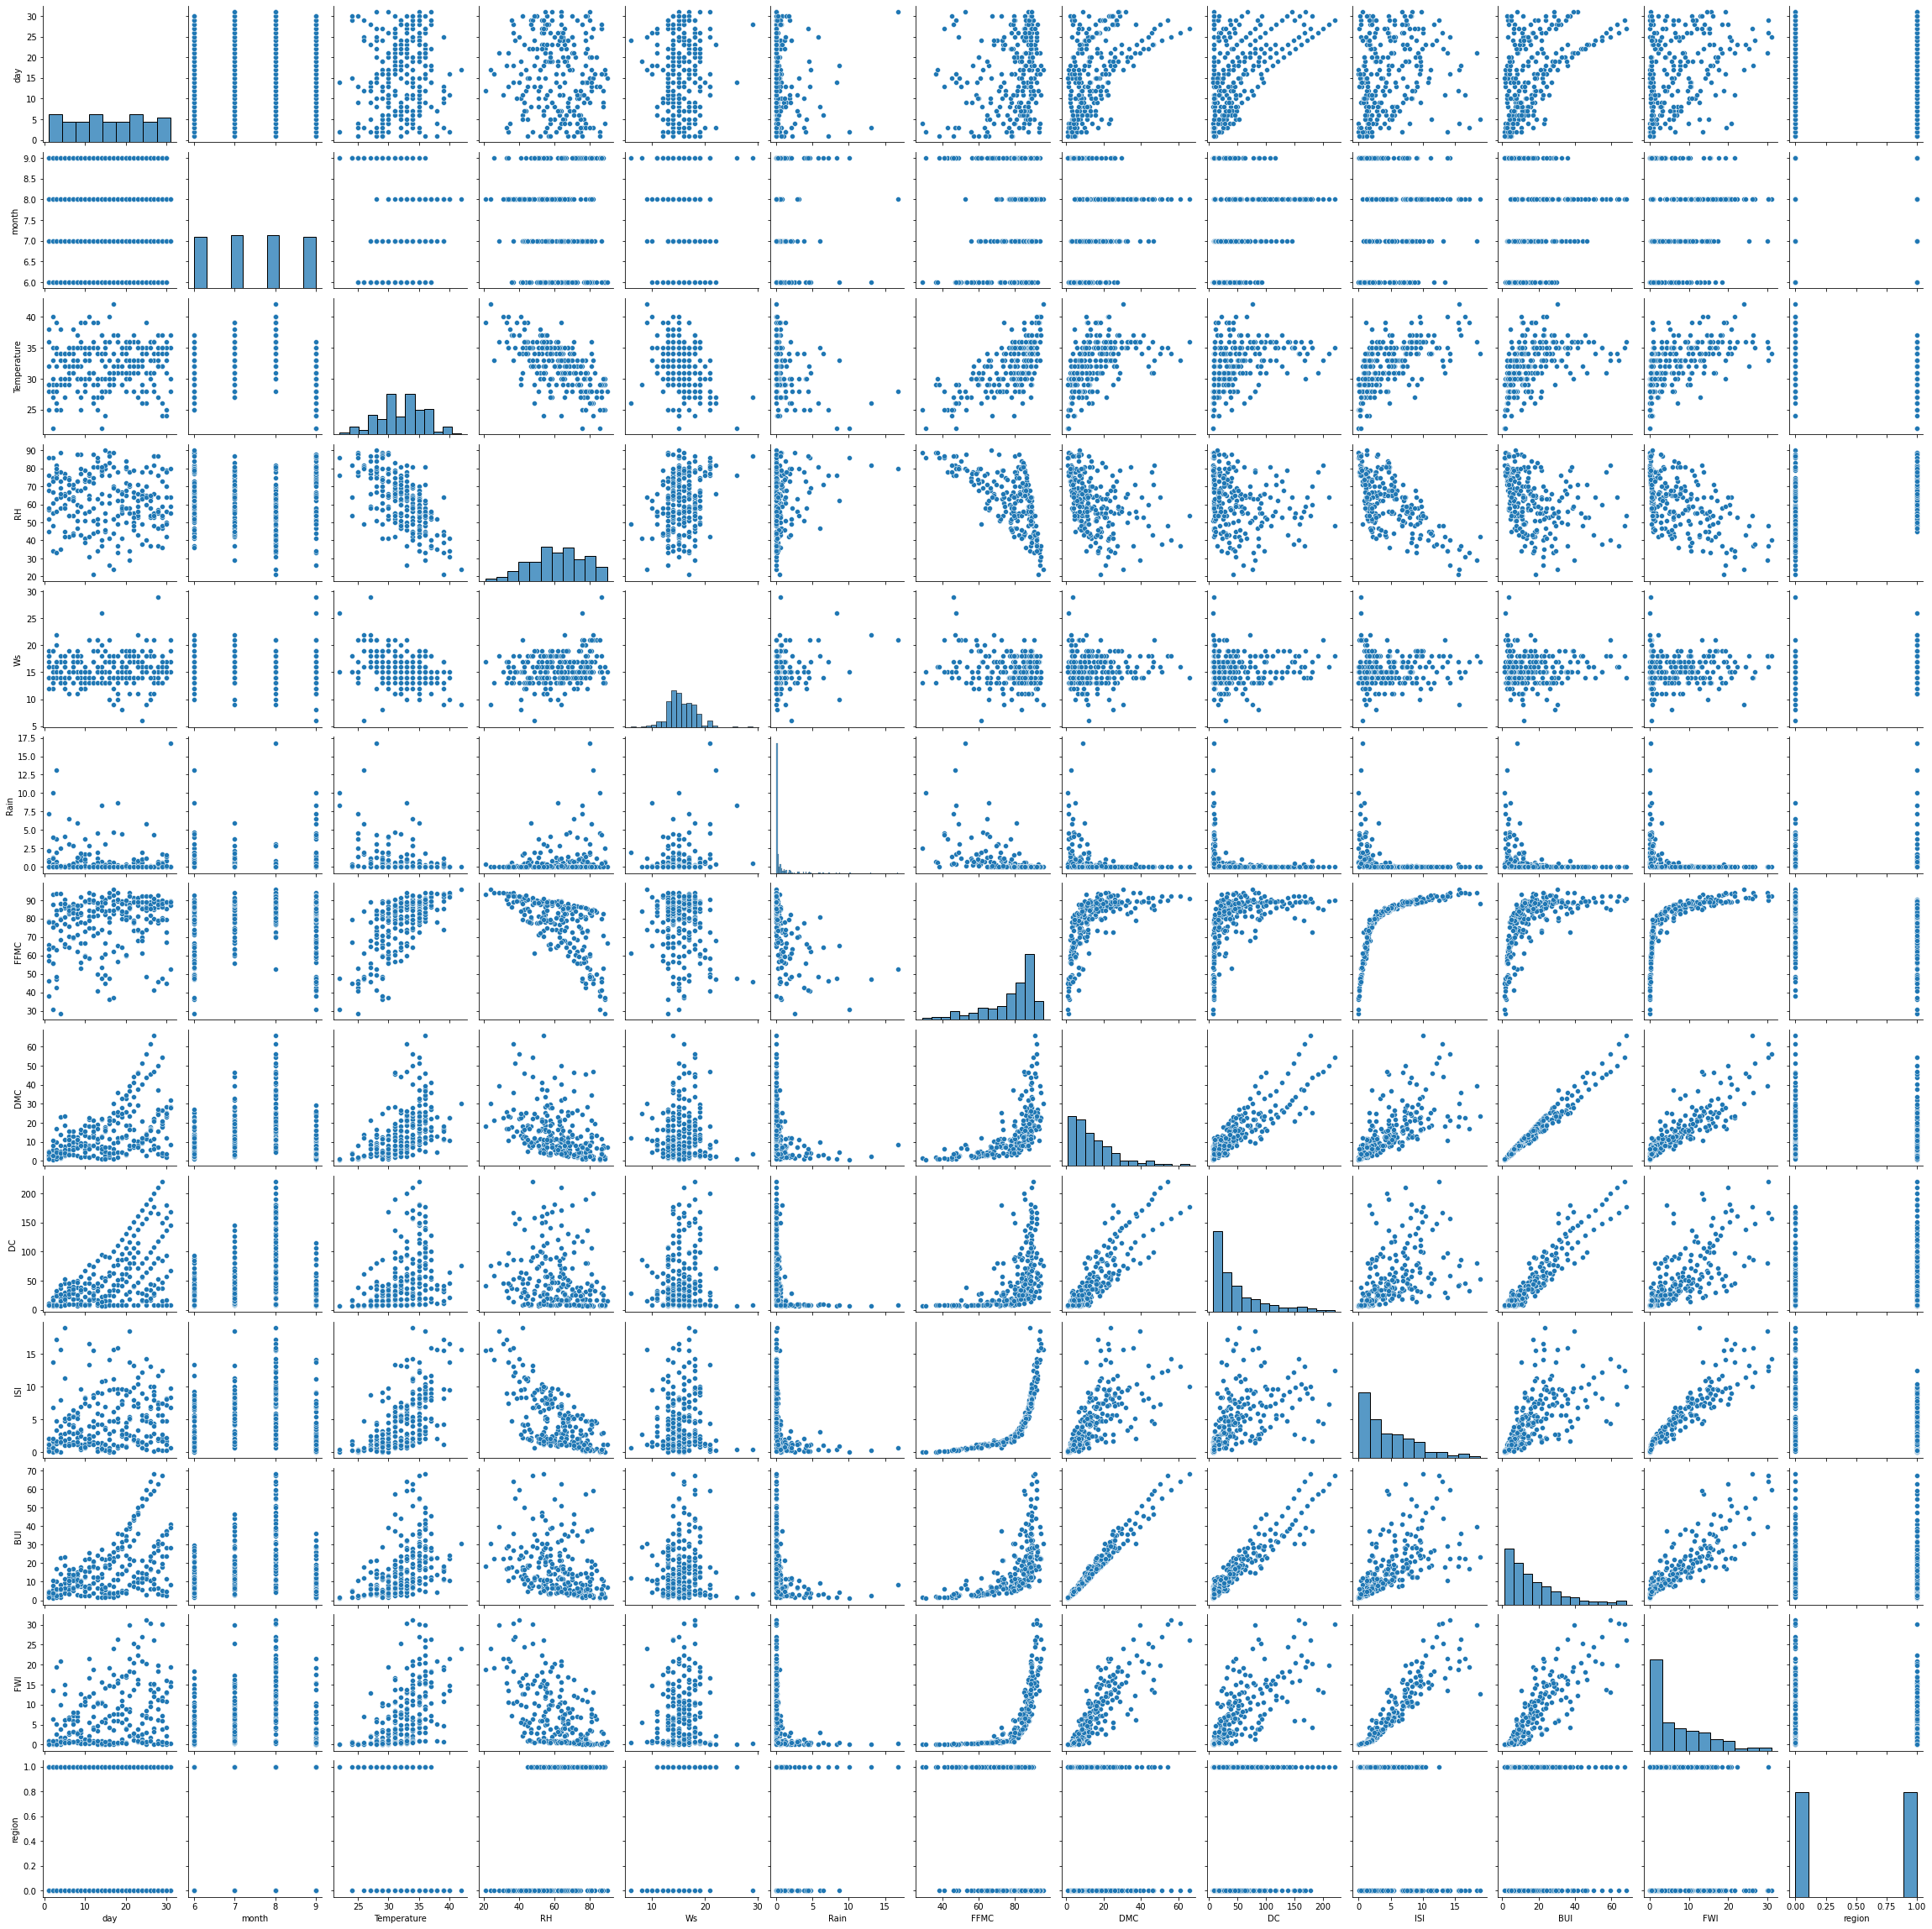

In [166]:
sns.pairplot(data = df_copy)

# Final Report

- DMC & DC are highly correlated with BUI
- Relative Humidity is higher in region 1
- average wind speed is higher in region 1
- windspeed is decreasing with increase in temperature
- maximum fire occurs in the month of july and aug.
- Temperature highly impacts the fire 
- Maximum fire occures at humidity between 40-60
- Rain inversely impacts the fire
- Increase in DMC, DC, ISI, BUI, FWI increase chances of fire.